In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import roberts

In [3]:
path_partition=r'D:\Projects\cs-8395-dl\Assignment_3_segmentation\partition\train_test_org\Training.txt'
with open(path_partition,'r') as f:
    fileIds = [fl.strip() for fl in f.readlines() ]

In [4]:
from tqdm import tqdm_notebook as tqdm
spleen_pixels=[]
for fileId in tqdm(fileIds):
    filepath_img = r'D:\Data\cs-8395-dl\assignment3\Training\img\img{}.nii.gz'.format(
        fileId)
    img_nib = nib.load(filepath_img)
    img_np =img_nib.get_fdata()
    filepath_label = r'D:\Data\cs-8395-dl\assignment3\Training\label\label{}.nii.gz'.format(fileId)
    label_nib = nib.load(filepath_label)
    label_np = label_nib.get_fdata()
    spleen_pixels.append(img_np[label_np==1])

In [5]:
spleen_pixels = np.concatenate(np.array(spleen_pixels),axis=0)
spleen_pixels.shape

(4506168,)

In [6]:
spleen_pixels.min(), spleen_pixels.max(), np.median(spleen_pixels), spleen_pixels.mean()

(-777.0, 885.0, 100.0, 97.88630849981625)

Text(0, 0.5, 'count')

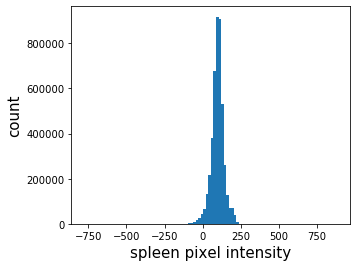

In [15]:
plt.figure(figsize=(5,4))
_=plt.hist(spleen_pixels,bins=100)
plt.xlabel('spleen pixel intensity', fontsize = 15)
plt.ylabel('count', fontsize = 15)

In [40]:
 spleen_pixels.mean()+(-1.645)*np.std(spleen_pixels), spleen_pixels.mean()+(1.645)*np.std(spleen_pixels)

(29.031306970272723, 166.7413100293598)

In [41]:
 spleen_pixels.mean()+(-2.326)*np.std(spleen_pixels), spleen_pixels.mean()+(2.326)*np.std(spleen_pixels)

(0.5265920513552942, 195.2460249482772)